# Sales Data Analysis 🧐

## Load Dataset 💻

In [30]:
import pandas as pd

df = pd.read_csv('/Users/ethanngo/Desktop/Stores.csv')


# Display the first few rows
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


# Check for Missing Values 🔎

In [6]:
print(df.isnull().sum())

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64


In [40]:
# Check to see if there is a "Year" colum. If there is, then change "Year" column into datetime format. 

if "Year" in df.columns:
    print("The 'Year' column exists!")
else: print("'Year' does not exist.")

'Year' does not exist.


## Calculating Stat Metrics 🧮

In [71]:
import numpy as np

# Calculate mean and standard deviation of Store Sales using numpy
mean_sales = np.mean(df['Store_Sales'])
std_sales = np.std(df['Store_Sales'])

print(f"Mean Store Sales: {mean_sales}")
print(f"Standard Deviation of Store Sales: {std_sales}")

# Calculate median Daily Customer Count using numpy
median_customers = np.median(df['Daily_Customer_Count'])

print(f"Median Daily Customer Count: {median_customers}")


Mean Store Sales: 59351.30580357143
Standard Deviation of Store Sales: 17181.146168819505
Median Daily Customer Count: 780.0


## Normalization & Scaling 

In [74]:
# Normalize Store Sales using numpy
normalized_sales = (df['Store_Sales'] - np.min(df['Store_Sales'])) / (np.max(df['Store_Sales']) - np.min(df['Store_Sales']))

df['Normalized Sales'] = normalized_sales
print(df.head())


   Store ID   Store_Area  Items_Available  Daily_Customer_Count  Store_Sales  \
0          1        1659             1961                   530        66490   
1          2        1461             1752                   210        39820   
2          3        1340             1609                   720        54010   
3          4        1451             1748                   620        53730   
4          5        1770             2111                   450        46620   

   Normalized Sales  
0          0.508580  
1          0.245562  
2          0.385503  
3          0.382742  
4          0.312623  


## High Sales Indicator 📈

In [82]:
# Used numpy to create an array
sales_array = np.array(df['Store_Sales'])

# Generated new feature indicating high sales if Store Sales is greater than the average sales.
df['High Sales Indicator'] = np.where(df['Store_Sales'] > mean_sales, 1, 0)
print(df.head())


   Store ID   Store_Area  Items_Available  Daily_Customer_Count  Store_Sales  \
0          1        1659             1961                   530        66490   
1          2        1461             1752                   210        39820   
2          3        1340             1609                   720        54010   
3          4        1451             1748                   620        53730   
4          5        1770             2111                   450        46620   

   Normalized Sales  High Sales Indicator  
0          0.508580                     1  
1          0.245562                     0  
2          0.385503                     0  
3          0.382742                     0  
4          0.312623                     0  


## Correlations 

In [49]:
correlation = df[['Store_Area', 'Store_Sales']].corr()

print("Correlation between Store Area and Store Sales:")
print(correlation)

Correlation between Store Area and Store Sales:
             Store_Area  Store_Sales
Store_Area     1.000000     0.097474
Store_Sales    0.097474     1.000000


In [53]:
correlation_customer_sales = df[['Daily_Customer_Count', 'Store_Sales']].corr()

print("Correlation between Daily Customer Count and Store Sales:")
print(correlation_customer_sales)

Correlation between Daily Customer Count and Store Sales:
                      Daily_Customer_Count  Store_Sales
Daily_Customer_Count              1.000000     0.008629
Store_Sales                       0.008629     1.000000


In [55]:
correlation_items_sales_customers = df[['Items_Available', 'Store_Sales', 'Daily_Customer_Count']].corr()

print("\nCorrelation between Items Available, Store Sales, and Daily Customer Count:")
print(correlation_items_sales_customers)


Correlation between Items Available, Store Sales, and Daily Customer Count:
                      Items_Available  Store_Sales  Daily_Customer_Count
Items_Available              1.000000     0.098849             -0.040978
Store_Sales                  0.098849     1.000000              0.008629
Daily_Customer_Count        -0.040978     0.008629              1.000000


## Visualizing the Data 👀

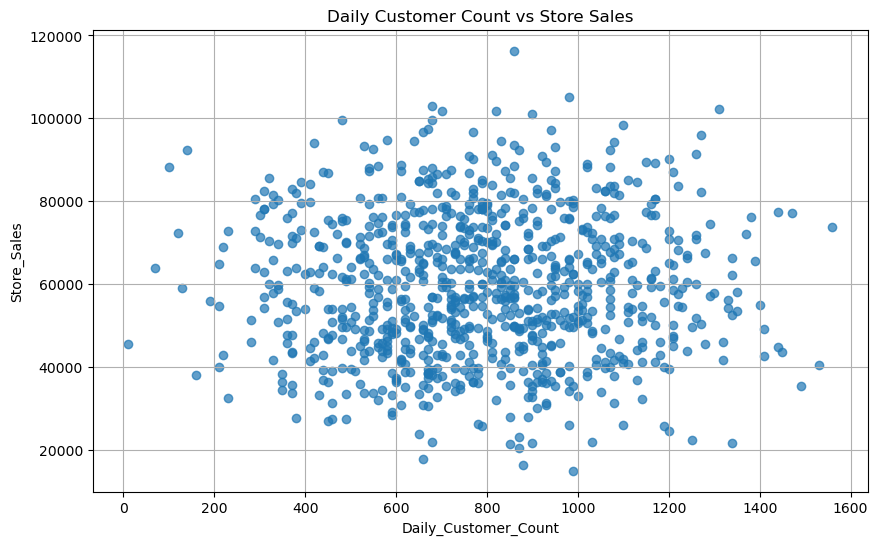

In [58]:
import matplotlib.pyplot as plt

# Scatter plot for Daily Customer Count vs Store Sales
plt.figure(figsize=(10, 6))
plt.scatter(df['Daily_Customer_Count'], df['Store_Sales'], alpha=0.7)
plt.xlabel('Daily_Customer_Count')
plt.ylabel('Store_Sales')
plt.title('Daily Customer Count vs Store Sales')
plt.grid(True)
plt.show()

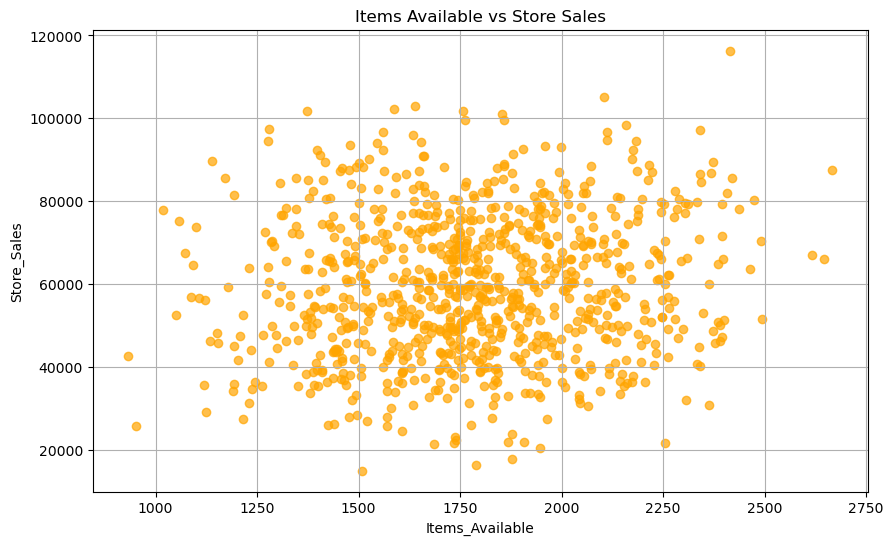

In [60]:
# Scatter plot for Items Available vs Store Sales
plt.figure(figsize=(10, 6))
plt.scatter(df['Items_Available'], df['Store_Sales'], alpha=0.7, color='orange')
plt.xlabel('Items_Available')
plt.ylabel('Store_Sales')
plt.title('Items Available vs Store Sales')
plt.grid(True)
plt.show()

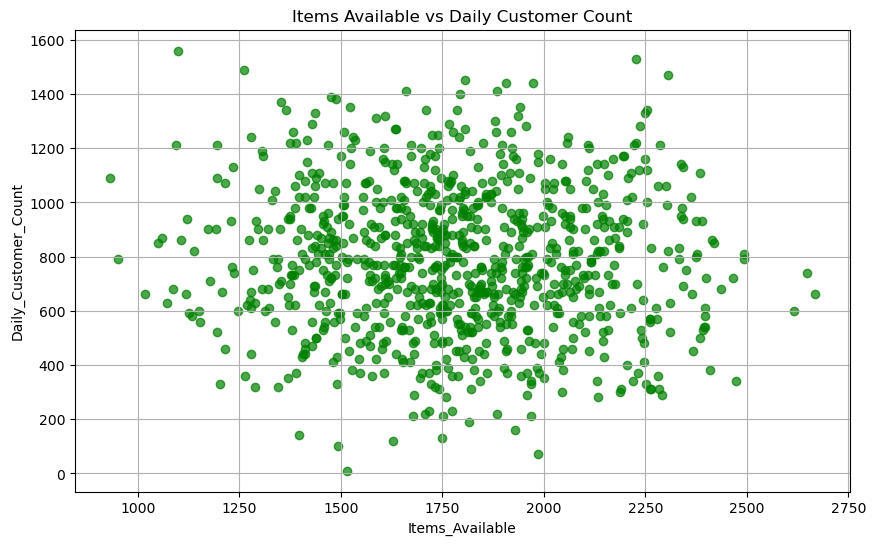

In [62]:
# Scatter plot for Items Available vs Daily Customer Count
plt.figure(figsize=(10, 6))
plt.scatter(df['Items_Available'], df['Daily_Customer_Count'], alpha=0.7, color='green')
plt.xlabel('Items_Available')
plt.ylabel('Daily_Customer_Count')
plt.title('Items Available vs Daily Customer Count')
plt.grid(True)
plt.show()

In [28]:
plt.savefig('customer_count_vs_sales.png')
plt.savefig('items_available_vs_sales.png')
plt.savefig('items_available_vs_customer_count.png')


<Figure size 640x480 with 0 Axes>

# Summary Report :p

In this analysis of a Kaggle dataset, I imported a csv and utilized tools of pandas, numPy, and Matplotlib to gather general insight on the dataset. From what I gathered, there are no missing values to begin with, so we dive right in. There is no strong correlation at all between any of the columns in the dataset, which is shown by the scatterplots. If there was a strong correlation, the measurements in "Correlations" would be closer to the values of either -1 or 1. However, the correlation measurements are closer to 0, which indicates null correlation. What I conclude with is that we may need more data for better insight (such as a Date/Year column). 

Kaggle link: https://www.kaggle.com/datasets/surajjha101/stores-area-and-sales-data
Dataset Name: Supermarket store branches sales analysis